In [116]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager

In [117]:
locations = ["C:\\Users\\George\\Documents\\Football Analytics\\Kanit.zip"]

In [118]:
font_files = font_manager.findSystemFonts(fontpaths=locations)

In [119]:
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

In [120]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Specify your font
regular = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Regular.ttf")  # Update the path to where the font is installed on your system
light = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Light.ttf")  # Update the path to where the font is installed on your system
bold = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Bold.ttf")  # Update the path to where the font is installed on your system


In [121]:
response = requests.get('https://dataviz.theanalyst.com/football-season-metrics/8-2023-team-stats.json')
data = response.json()
league = 'Premier League'

In [122]:
df = pd.DataFrame(data)
df = df[['team_name','team_op_xG','team_sp_xG']]

In [141]:
df['team_name'] = df['team_name'].replace({'West Bromwich Albion':'West Brom','Preston North End':'Preston','Queens Park Rangers':'QPR','Blackburn Rovers':'Blackburn','Sheffield Wednesday':'Sheffield Weds','Huddersfield Town':'Huddersfield','Rotherham United':'Rotherham Utd', 'Tottenham Hotspur':'Tottenham', 'Newcastle United':'Newcastle Utd', 'Manchester United':'Manchester Utd', 'Brighton and Hove Albion':'Brighton', 'Wolverhampton Wanderers':'Wolves', 'Nottingham Forest':'Nott\'ham Forest', 'Sheffield United':'Sheffield Utd'})

In [142]:
df['Badge'] = df['team_name'].apply(lambda x: f"C:/Users/George/Documents/Football Analytics/Team Logos/{x.lower()}_logo.png")

In [143]:
todays_date = pd.to_datetime('today').strftime('%d/%m/%Y')

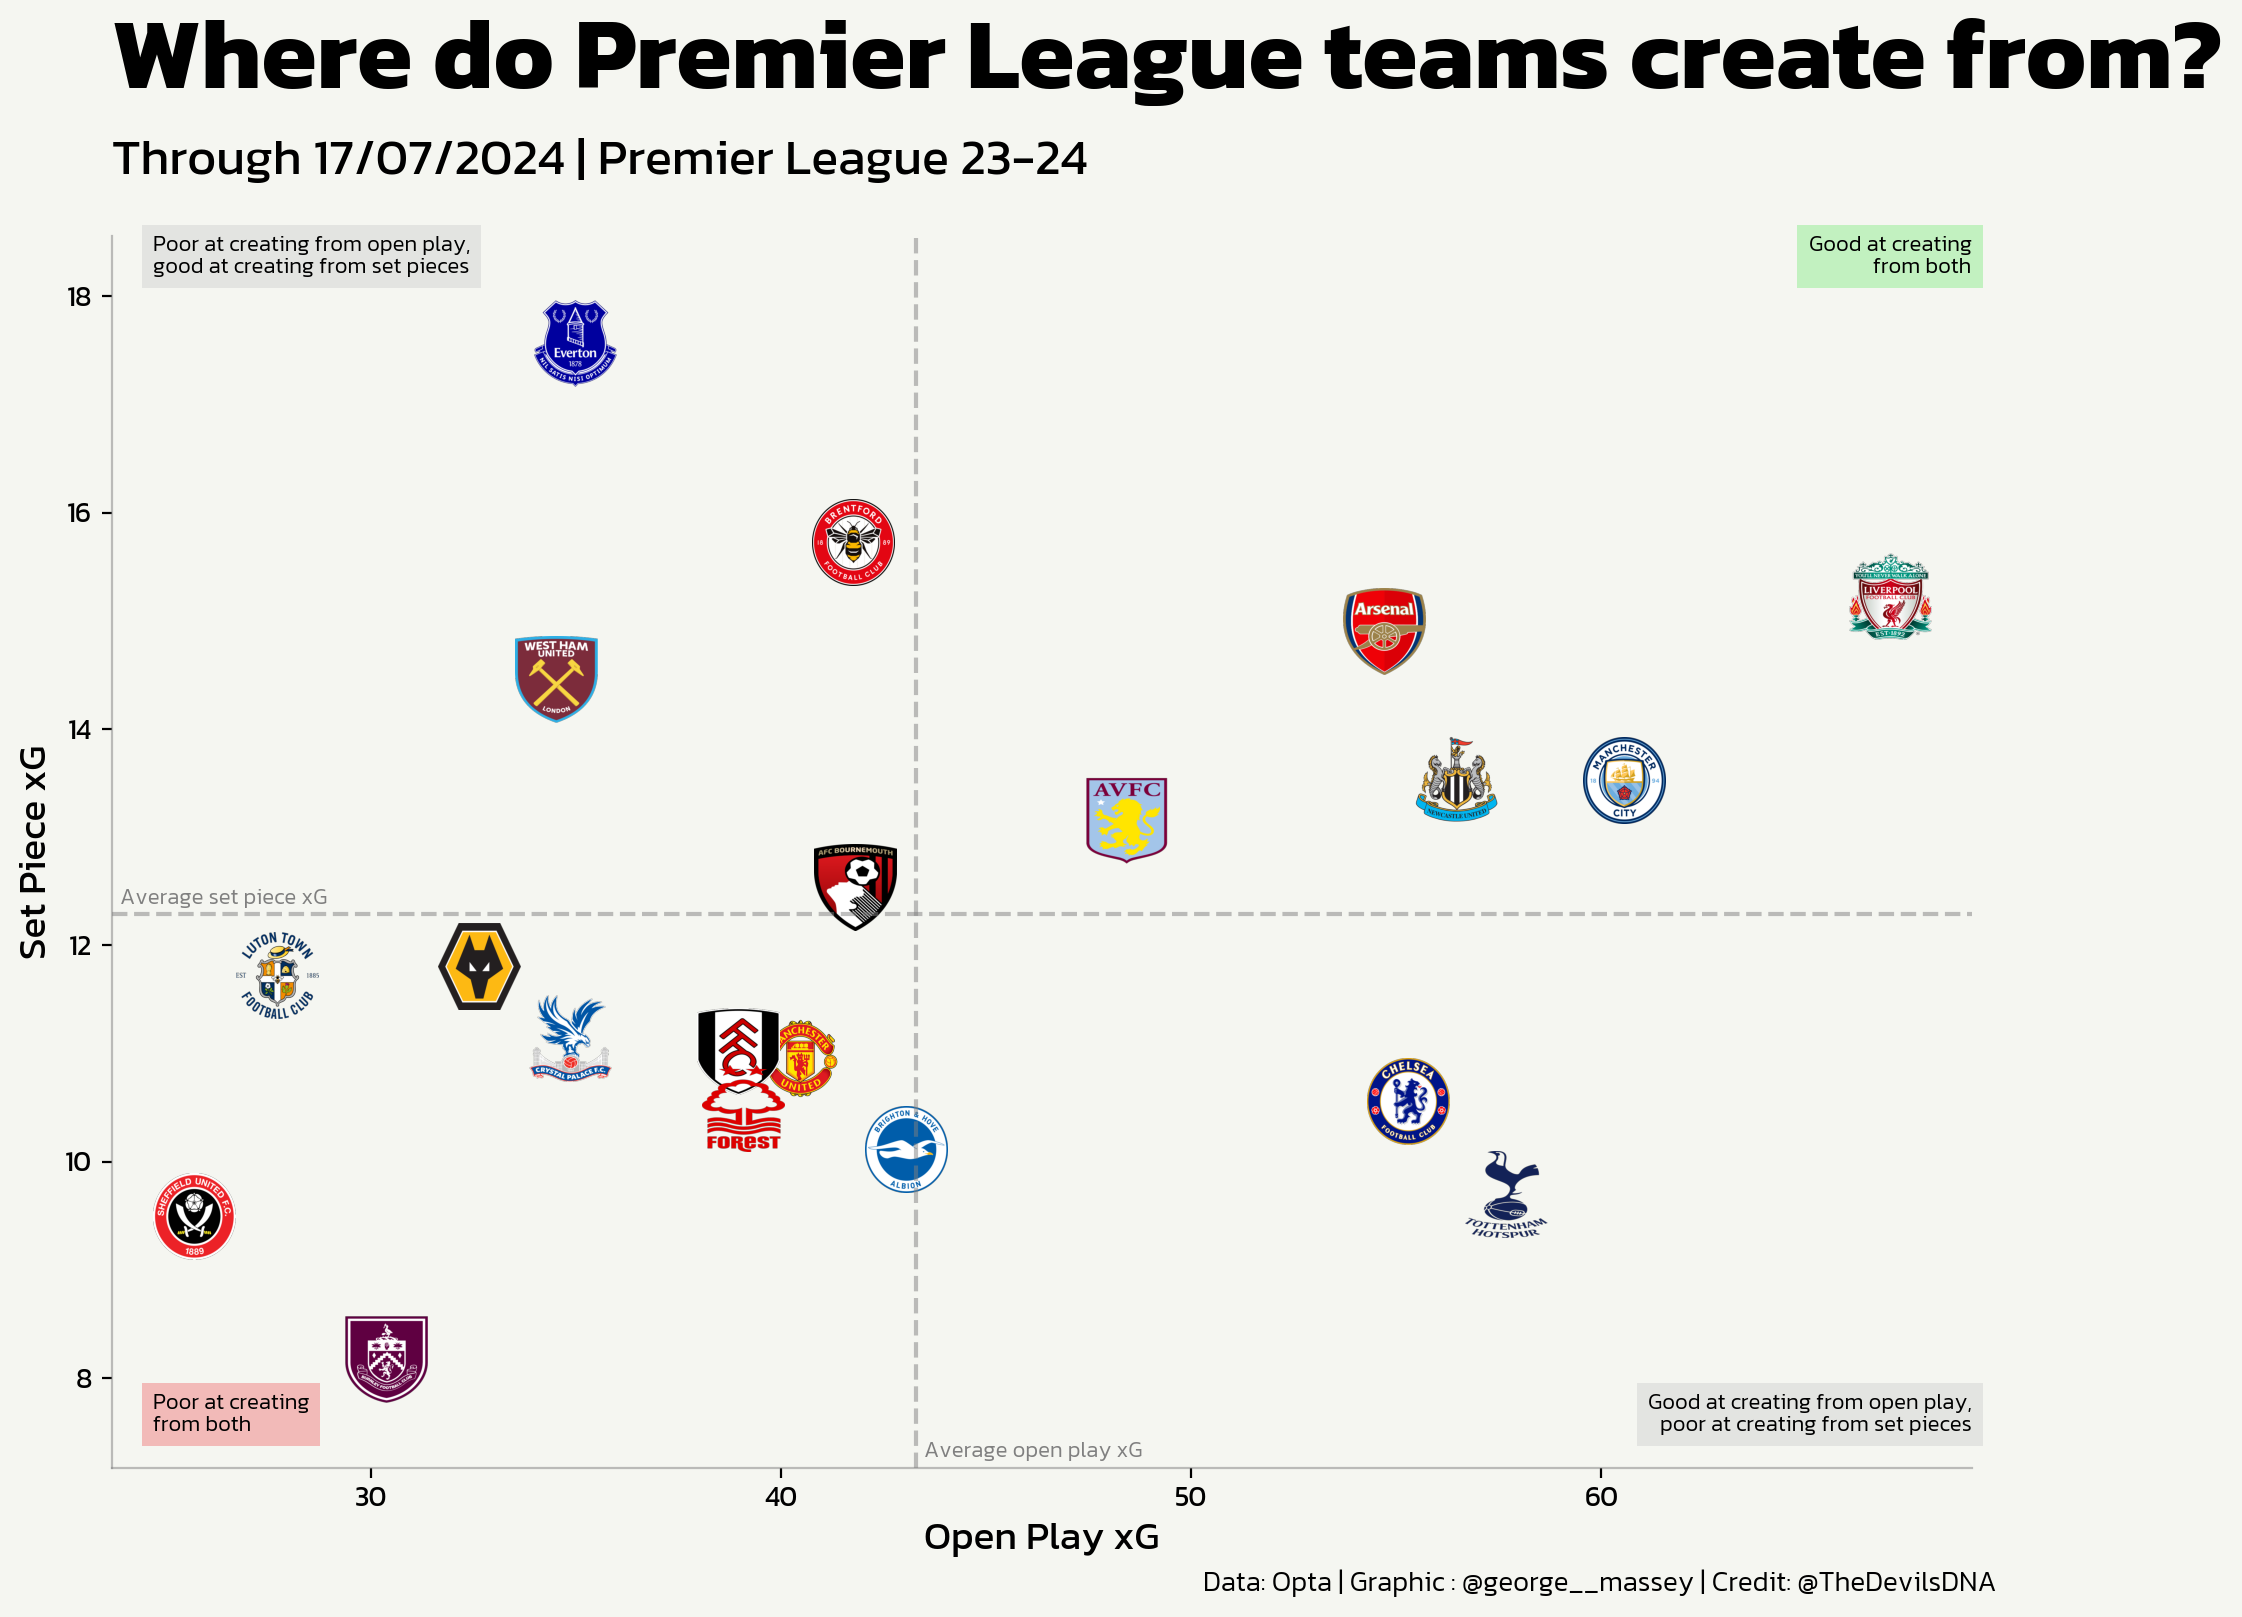

In [144]:
import matplotlib.patches as patches

plt.figure(figsize=(12, 8), dpi=200, facecolor='#F5F6F1')  # Set the facecolor to #141514

for i, team in df.iterrows():
    badge = plt.imread(team['Badge'])
    plt.imshow(badge, extent=(team['team_op_xG']-1, team['team_op_xG']+1, team['team_sp_xG']-0.4, team['team_sp_xG']+0.4), aspect='auto', alpha=1)

# Add labels and title
plt.ylabel('Set Piece xG', fontproperties = regular, size = 14)  # Set the xlabel color to white
plt.xlabel('Open Play xG', fontproperties = regular, size = 14)  # Set the ylabel color to white

plt.ylim(df['team_sp_xG'].min()-1, df['team_sp_xG'].max()+1)
plt.xlim(df['team_op_xG'].min()-2, df['team_op_xG'].max()+2)

# Draw a line from the y-axis at the average value
plt.axhline(df['team_sp_xG'].mean(), color='grey', linestyle='--', alpha=0.5)
plt.axvline(df['team_op_xG'].mean(), color='grey', linestyle='--', alpha=0.5)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['bottom'].set_color('grey')
plt.gca().spines['left'].set_alpha(0.5)
plt.gca().spines['bottom'].set_alpha(0.5)

xlim = plt.xlim()
ylim = plt.ylim()

plt.text(xlim[0]+0.2, df['team_sp_xG'].mean()+0.15, "Average set piece xG", color='grey', fontsize=8, ha='left', va='center', fontproperties = light)
plt.text(df['team_op_xG'].mean()+0.2, ylim[0]+0.15, "Average open play xG", color='grey', fontsize=8, ha='left', va='center', fontproperties = light)

# Top Left
plt.text(xlim[0]+1, ylim[1], "Poor at creating from open play,\ngood at creating from set pieces", 
         bbox=dict(facecolor='lightgray', alpha=0.5, edgecolor='none'),
         ha='left', va='top', fontsize=8, wrap=True, fontproperties = light)
# Top Right
plt.text(xlim[1], ylim[1], "Good at creating\nfrom both", 
         bbox=dict(facecolor='lightgreen', alpha=0.5, edgecolor='none'),
         ha='right', va='top', fontsize=8, wrap=True, fontproperties = light)
# Bottom Left
plt.text(xlim[0]+1, ylim[0]+0.3, "Poor at creating\nfrom both", 
         bbox=dict(facecolor='lightcoral', alpha=0.5, edgecolor='none'),
         ha='left', va='bottom', fontsize=8, wrap=True, fontproperties = light)
# Bottom Right
plt.text(xlim[1], ylim[0]+0.3, "Good at creating from open play,\npoor at creating from set pieces", 
         bbox=dict(facecolor='lightgray', alpha=0.5, edgecolor='none'),
         ha='right', va='bottom', fontsize=8, wrap=True, fontproperties = light)

plt.text(0,1.12, f"Where do {league} teams create from?", ha = 'left',fontsize=30, transform=plt.gca().transAxes, fontproperties=bold)
plt.text(0,1.05, f"Through {todays_date} | {league} 23-24", ha = 'left',fontsize=18, transform=plt.gca().transAxes, fontproperties=regular)
plt.text(0.8, -0.1, "Data: Opta | Graphic : @george__massey | Credit: @TheDevilsDNA", fontsize=10, ha = 'center',transform=plt.gca().transAxes, fontproperties=light)

# Set the ticks color to white
plt.xticks(fontproperties = regular)
plt.yticks(fontproperties = regular)

# Set the plot background color to #141514
plt.gca().set_facecolor('#F5F6F1')
# Add text box in each quadrant

plt.savefig(
    f"C:/Users/George/Documents/Football Analytics/Visuals/{league} SP xG v OP xG.png",
    dpi=200,
    bbox_inches="tight"
)

plt.show()